### Multilayer Perceptron

We’ll be using the well known MNIST database of handwritten digits, which consists of approximately 70,000 total samples of handwritten grayscale digit (0-9) images, each image of size is 8x8 and intensity level varies from 0-255 with accompanying label integer 0 to 9 for 60,000 of them and remaining without label(test data set). 

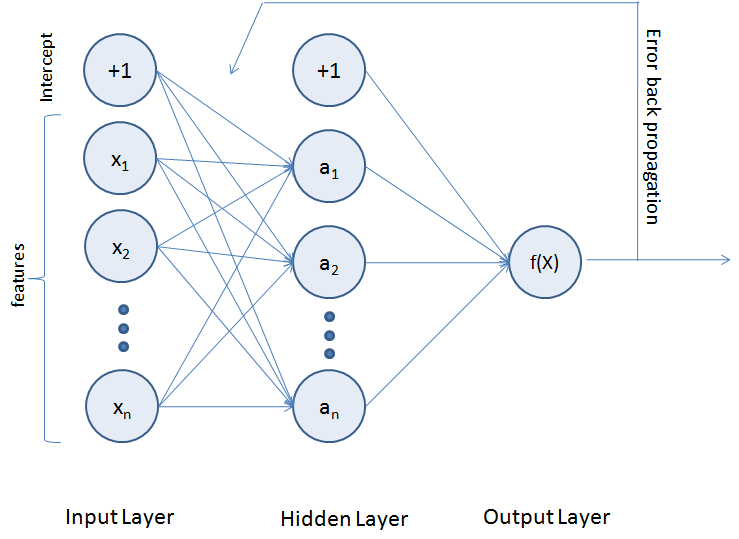

In [1]:
from IPython.display import Image
Image(filename='../Chapter 6 Figures/MLP.png', width=800)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.datasets import load_digits
from sklearn.datasets import fetch_mldata

# Needed to show the plots inline
%matplotlib inline

np.random.seed(seed=2017)

In [2]:
# Load data
digits = load_digits()
print('We have %d samples'%len(digits.target))

We have 1797 samples


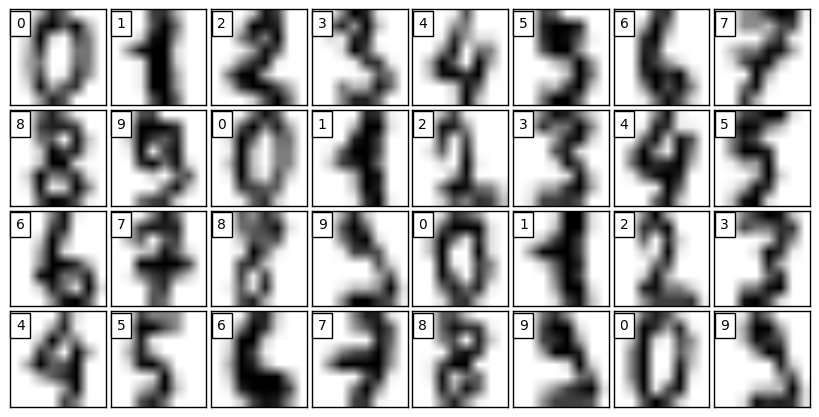

In [22]:
## plot the first 32 samples to get a sense of the data
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(32):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],  cmap=plt.cm.gray_r)
    ax.text(0, 1, str(digits.target[i]), bbox=dict(facecolor='white'))

In [4]:
# split data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=2017)
print 'Number of samples in training set: %d' %(len(y_train))
print 'Number of samples in test set: %d' %(len(y_test))  

# Standardise data, and fit only to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Apply the transformations to the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', max_iter = 100)

# Train the classifier with the traning data
mlp.fit(X_train_scaled,y_train)

Number of samples in training set: 1437
Number of samples in test set: 360


C:\Users\Manoh\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [5]:
print("Training set score: %f" % mlp.score(X_train_scaled, y_train))
print("Test set score: %f" % mlp.score(X_test_scaled, y_test))

Training set score: 0.990953
Test set score: 0.983333


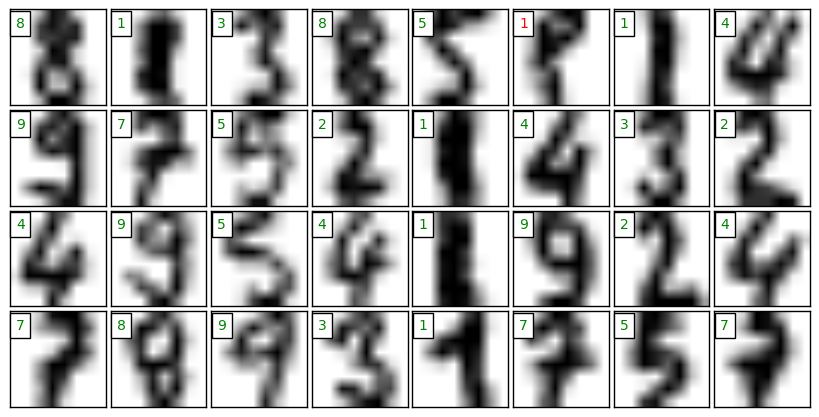

In [21]:
# predict results from the test data
X_test_predicted = mlp.predict(X_test_scaled)

fig = plt.figure(figsize=(8, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(32):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.gray_r)

    # label the image with the target value
    if X_test_predicted[i] == y_test[i]:
        ax.text(0, 1, X_test_predicted[i], color='green', bbox=dict(facecolor='white'))
    else:
        ax.text(0, 1, X_test_predicted[i], color='red', bbox=dict(facecolor='white'))

### Additional Example 1

Let's apply MLP on PIMA diabetes data set

In [7]:
df = pd.read_csv("Data/Diabetes.csv")

X = df.ix[:,0:8].values
y = df['class'].values     # dependent variables
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Standardazie data, fit only to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

print "Confusion Matrix: \n", confusion_matrix(y_test,predictions)
print "Classification Repor: \n", classification_report(y_test,predictions)

Confusion Matrix: 
[[121  19]
 [ 23  29]]
Classification Repor: 
             precision    recall  f1-score   support

          0       0.84      0.86      0.85       140
          1       0.60      0.56      0.58        52

avg / total       0.78      0.78      0.78       192



### Additional Example 2

MLP for predicting breat cancer

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

# 569 data points with 30 features
cancer['data'].shape

X = cancer['data']
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Standardazie data, fit only to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

print "Confusion Matrix: \n", confusion_matrix(y_test,predictions)
print "Classification Repor: \n", classification_report(y_test,predictions)

Confusion Matrix: 
[[47  5]
 [ 1 90]]
Classification Repor: 
             precision    recall  f1-score   support

          0       0.98      0.90      0.94        52
          1       0.95      0.99      0.97        91

avg / total       0.96      0.96      0.96       143

